Lara R. Jakosalem

# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo

# Fetch dataset
hepatitis = fetch_ucirepo(id=46)

# Convert to DataFrame for easier handling
X = pd.DataFrame(hepatitis.data.features)

# Ensure targets are correctly formatted as a Series
if isinstance(hepatitis.data.targets, pd.DataFrame):
    y = hepatitis.data.targets.squeeze()  # Convert DataFrame to Series if needed
else:
    y = pd.Series(hepatitis.data.targets, name='target')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [8]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           1       0.12      0.14      0.13         7
           2       0.74      0.71      0.72        24

    accuracy                           0.58        31
   macro avg       0.43      0.43      0.43        31
weighted avg       0.60      0.58      0.59        31



In [9]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           1       0.12      0.14      0.13         7
           2       0.74      0.71      0.72        24

    accuracy                           0.58        31
   macro avg       0.43      0.43      0.43        31
weighted avg       0.60      0.58      0.59        31



In [10]:
# Check the first few rows to understand the structure
print("Features Head:")
print(X.head())  # Check the first few rows of features
print("Targets Head:")
print(y.head())  # Check the first few rows of targets

Features Head:
   Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0   30    2      1.0           2      2.0      2.0       2.0        1.0   
1   50    1      1.0           2      1.0      2.0       2.0        1.0   
2   78    1      2.0           2      1.0      2.0       2.0        2.0   
3   31    1      NaN           1      2.0      2.0       2.0        2.0   
4   34    1      2.0           2      2.0      2.0       2.0        2.0   

   Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0         2.0              2.0      2.0      2.0      2.0        1.0   
1         2.0              2.0      2.0      2.0      2.0        0.9   
2         2.0              2.0      2.0      2.0      2.0        0.7   
3         2.0              2.0      2.0      2.0      2.0        0.7   
4         2.0              2.0      2.0      2.0      2.0        1.0   

   Alk Phosphate   Sgot  Albumin  Protime  Histology  
0           85.0   18.0      4.0      NaN     

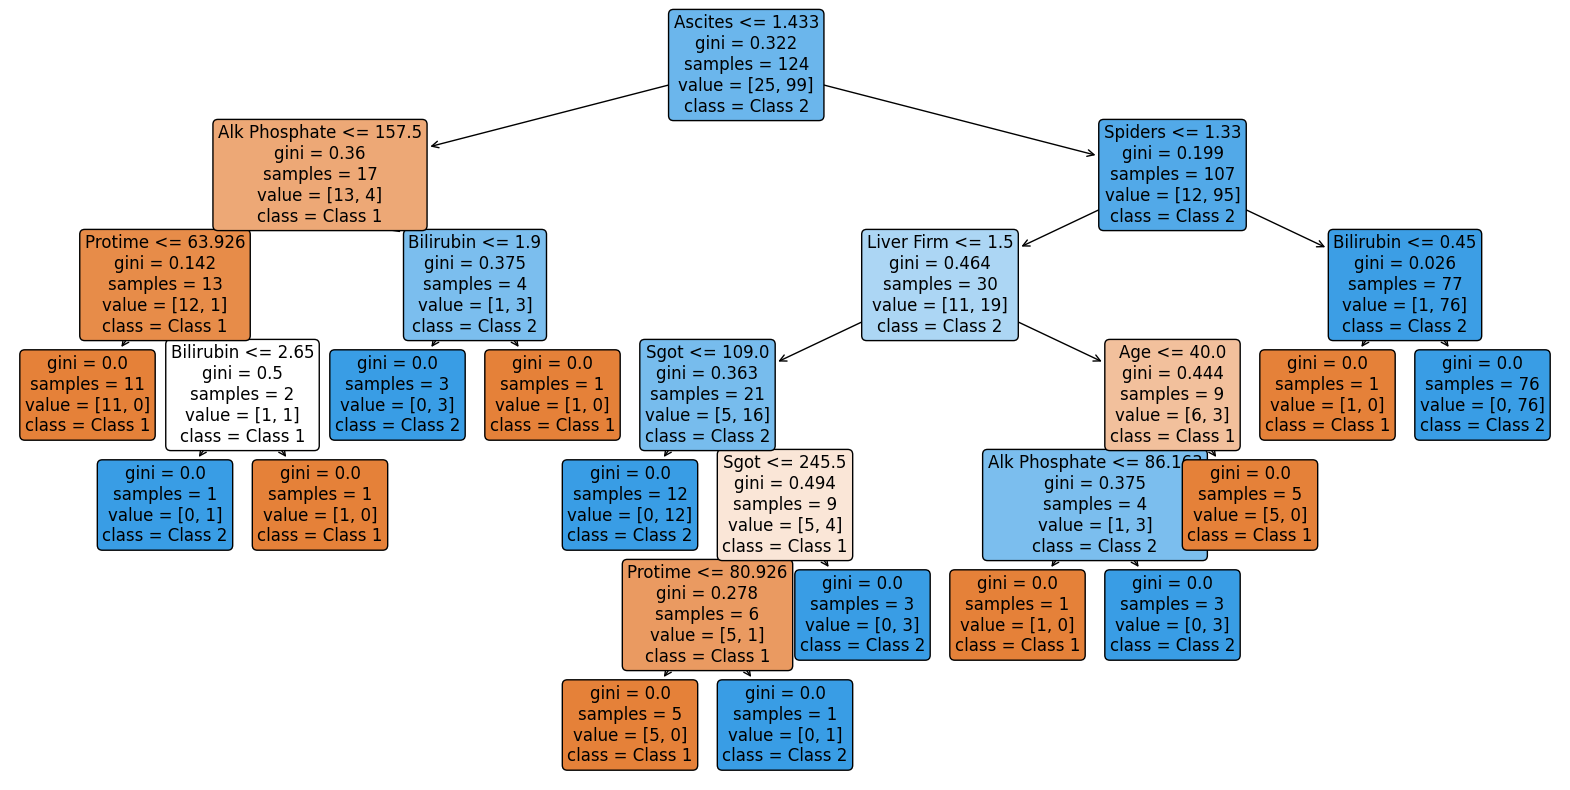

In [11]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(clf, feature_names=X.columns, class_names=['Class 1', 'Class 2'], filled=True, rounded=True, fontsize=12)
plt.show()


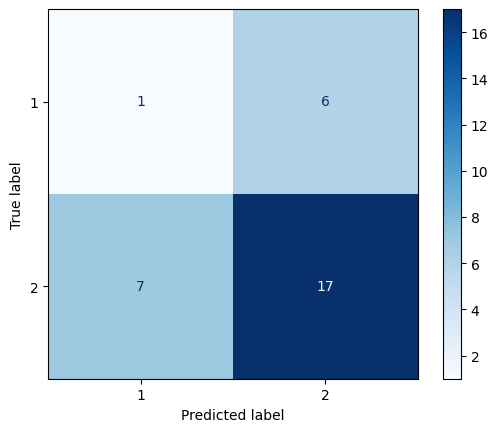

Confusion Matrix:
[[ 1  6]
 [ 7 17]]
True Positives: 1
False Positives: 6
False Negatives: 7
True Negatives: 17


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)

# Extracting values
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")
